In [129]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [60]:
import bz2
import ujson
import attr
import os
import math

import pandas as pd

from glob import glob
from collections import Counter, UserDict
from itertools import islice
from tqdm import tqdm_notebook

In [47]:
def zip_offset(seq):
    for i, item in enumerate(seq):
        offset = i / (len(seq)-1)
        yield item, offset

In [48]:
def zip_bin(seq, bin_count):
    for item, offset in zip_offset(seq):
        bin = math.floor(offset * bin_count) if offset < 1 else bin_count - 1
        yield item, bin

In [94]:
@attr.s
class Corpus:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [95]:
corpus = Corpus('/Users/dclure/Projects/data/novels.20.json/')

In [96]:
counts = Counter()
for novel in corpus.novels():
    for token in novel['token']:
        counts[token] += 1

HBox(children=(IntProgress(value=0), HTML(value='')))

In [97]:
sum(counts.values())

506249461

In [98]:
vocab = set([t for t, _ in counts.most_common(200)])

In [104]:
BIN_COUNT = 20

In [105]:
rows = []
for novel in corpus.novels():
    
    counts = Counter()
    for token, bin in zip_bin(novel['token'], BIN_COUNT):
        if token in vocab:
            counts[token, bin] += 1
            
    for (token, bin), count in counts.items():
        rel_count = count / (len(novel['token']) / BIN_COUNT)
        rows.append((novel['corpus'], novel['identifier'], token, bin, rel_count))

HBox(children=(IntProgress(value=0), HTML(value='')))

In [106]:
rbc = pd.DataFrame(rows, columns=('corpus', 'identifier', 'token', 'bin', 'rel_count'))

# a

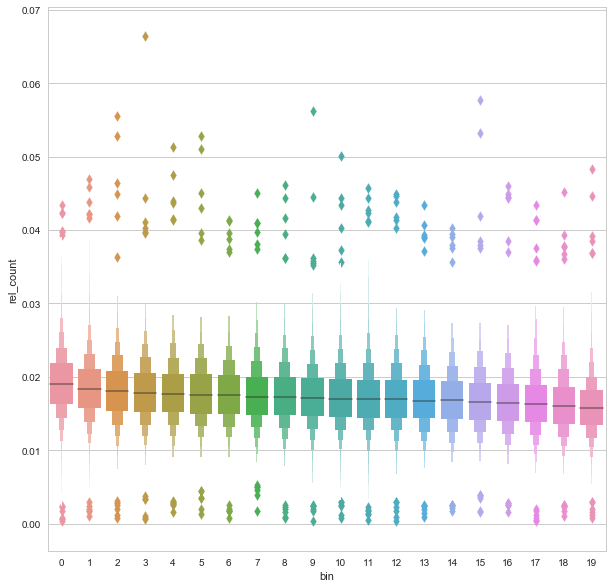

In [175]:
plt.figure(figsize=(10, 10))
sns.lvplot(data=rbc[rbc['token']=='a'], x='bin', y='rel_count')

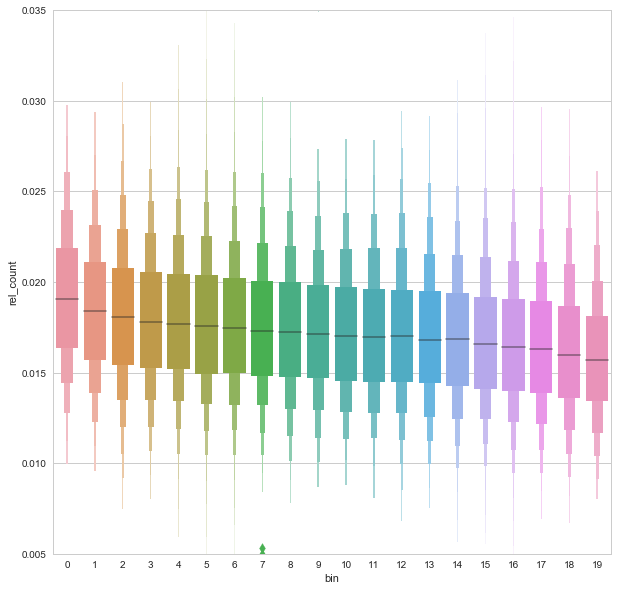

In [161]:
plt.figure(figsize=(10, 10))
plt.ylim(0.005, 0.035)
sns.lvplot(data=rbc[rbc['token']=='a'], x='bin', y='rel_count')

# the

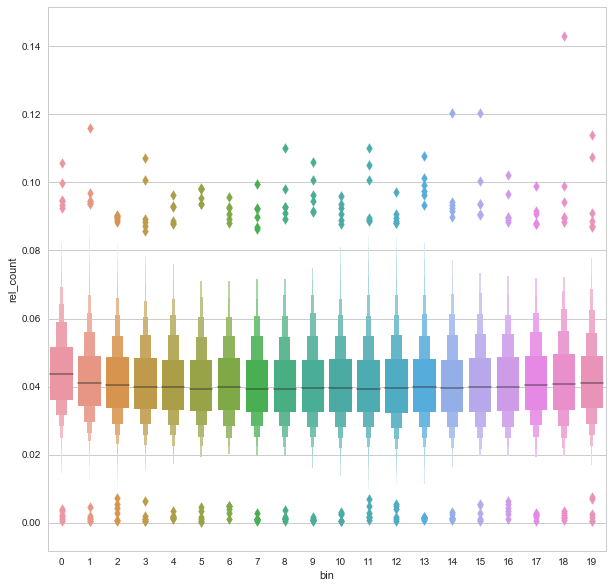

In [154]:
plt.figure(figsize=(10, 10))
sns.lvplot(data=rbc[rbc['token']=='the'], x='bin', y='rel_count')

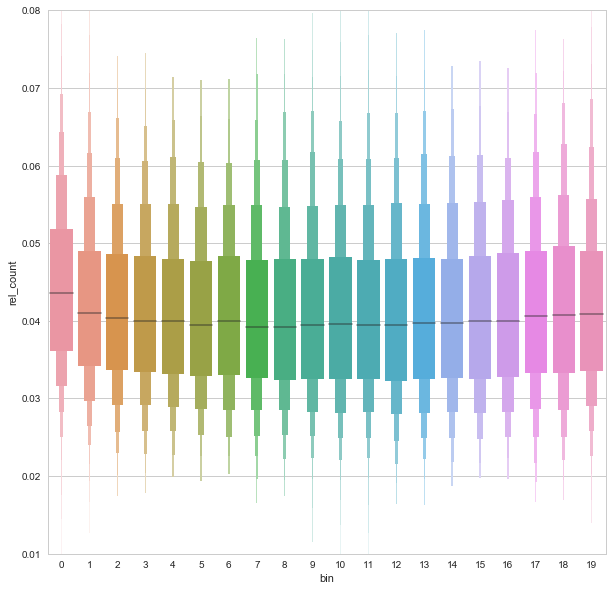

In [163]:
plt.figure(figsize=(10, 10))
plt.ylim(0.01, 0.08)
sns.lvplot(data=rbc[rbc['token']=='the'], x='bin', y='rel_count')